In [1]:
# import the required packages for the execution of the program
import pandas as pd
import numpy as np
import tweepy
import json
from geopy.geocoders import Nominatim
import time
import textblob
import re

from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.corpus import brown
from nltk.stem.wordnet import WordNetLemmatizer
import nltk
import re
import string

In [2]:
# save the twitter developer credentials for authentication
consumer_key = 'PekUwhQ8NaIB7kye74Zuwc5zN'
consumer_secret = 'ODZYsTbtG6JJrWZnQC8hARISSRcwN5uwiZdve3U9B0JbR7xXfg'
access_token = '832994996-2VqZdSdihKUdl73ONGtoPWfIIuV3l1xY0RG11cAr'
access_token_secret = 'crUrKJajF3f4puuVGgLNQxFZPShTikHuxg3Of0RRiSB0h'

In [3]:
# initialize authorization instance using credentials
authorization_instance = tweepy.OAuthHandler(consumer_key,consumer_secret)
authorization_instance.set_access_token(access_token, access_token_secret)
authorization_instance.secure = True

In [4]:
# initialize the twitter API object
twitter_api = tweepy.API(authorization_instance)
twitter_api

In [5]:
# define a function to fetch tweets based on location and query string
def get_tweets_by_location(query_string='', address_string='United States of America', tweet_count=1):
    geolocator = Nominatim()
    location = geolocator.geocode(address_string)
    print('Using cordinates for location:', location.address)
    latitude = str(location.latitude)
    longitude = str(location.longitude)
    radius='1000mi'
    mygeocode = ','.join([latitude,longitude,radius])
    print('geocode:',mygeocode)
    custom_tweets = twitter_api.search(q = query_string, 
                                       show_user = True,
                                       geocode = mygeocode, 
                                       lang = 'en', 
                                       tweet_mode = 'extended_mode',
                                      count= tweet_count)
    print(len(custom_tweets),'tweets found for the given query.')    
    return custom_tweets

    
    

In [6]:
mytweets = get_tweets_by_location(query_string='Priyanka Chopra',
                                  address_string='California, USA',
                                  tweet_count = 10)

Using cordinates for location: California, United States of America
geocode: 36.7014631,-118.7559974,1000mi
9 tweets found for the given query.


In [7]:
# iterate through the results returned from the function
for tweet in mytweets:
    print(tweet.user.screen_name)
    print(tweet.created_at)
    print(tweet.text,'\n')

HemantK647
2018-04-08 04:38:53
RT @ms_shreya: every now and then someone will tell me I look a bit like Priyanka Chopra and all of a sudden I feel like the baddest bitch… 

Nitu_23
2018-04-08 03:16:59
RT @ms_shreya: every now and then someone will tell me I look a bit like Priyanka Chopra and all of a sudden I feel like the baddest bitch… 

ms_shreya
2018-04-08 02:38:36
every now and then someone will tell me I look a bit like Priyanka Chopra and all of a sudden I feel like the baddest bitch in town 

LitchyRaw
2018-04-07 15:29:54
RT @haybaycutiepie: Priyanka Chopra is a goddess 😍 https://t.co/KoDoy0tdwe 

yasiru_vismini
2018-04-07 05:50:57
RT @haybaycutiepie: Priyanka Chopra is a goddess 😍 https://t.co/KoDoy0tdwe 

VikashS06547215
2018-04-07 01:07:44
RT @haybaycutiepie: Priyanka Chopra is a goddess 😍 https://t.co/KoDoy0tdwe 

socialcss_celeb
2018-04-06 20:40:37
https://t.co/2w6kZO8JpZ updates Priyanka Chopra https://t.co/MGtey1oSIn rank 83 to 82 

newssummeduphq
2018-04-06 19:13:09
Qu

In [8]:
# define a function to create a bag of words
def do_tokenization(sentence_list):
    tokenized_sentence_list = [word_tokenize(sentence) for sentence in sentence_list]
    return tokenized_sentence_list

# define a function to remove punctions and special characters
def remove_punctuation(tokenized_sentence_list):
    regex = re.compile('[%s]' % re.escape(string.punctuation)) #see documentation here: http://docs.python.org/2/library/string.html
    tokenized_no_punc_sentence_list = []

    for tokenized_sentence in tokenized_sentence_list:
        new_tokenized_sentence_list = []
        for word in tokenized_sentence: 
            new_word = regex.sub(u'', word)
            if not new_word == u'':
                new_tokenized_sentence_list.append(new_word)
        tokenized_no_punc_sentence_list.append(new_tokenized_sentence_list)
    return tokenized_no_punc_sentence_list

# define a function to remove stopwords
def remove_stopwords(tokenized_sentence_list):
#     print('Started removing stopwords')
    no_stopwords_sentence_list = []
    for tokenized_sentence in tokenized_sentence_list:
        for word in tokenized_sentence:
            if word in stopwords.words('english') and word != 'not':
                tokenized_sentence.remove(word)
        no_stopwords_sentence_list.append(tokenized_sentence)
    return no_stopwords_sentence_list


# define a function to lemmitize the words
def do_lemmitization(tokenized_sentence_list):
    wnl = WordNetLemmatizer()
    lemmitized_sentence_list = []

    for tokenized_sentence in tokenized_sentence_list:
        tokenized_sentence= list(map(wnl.lemmatize, tokenized_sentence))
        lemmitized_sentence_list.append(tokenized_sentence)
    return lemmitized_sentence_list

# define a function to remove unwanted tags
def remove_unwanted_tags(tokenized_sentence_list):
    # parameter is list of tokenized sentence
    '''
    Removed Tags details:

    MD: can,...
    PRP$,PRP: my,they
    DT,PDT
    R
    IN
    CC
    CD: cardinal number
    VBZ

    '''
    for id1, each in enumerate(tokenized_sentence_list):

        for id2,pair in enumerate(nltk.pos_tag(each)):
            # print(pair)
            if pair[1] in ['PRP','PDT','CC','DT','RP','IN','PRP$','MD','VBZ','CD','EX','VBN']:
                tokenized_sentence_list[id1].remove(pair[0])
    return tokenized_sentence_list
    
# define a driver function for preprocessing the tweets
def do_preprocessing(list_of_tweets):
    sentence_list = list_of_tweets
    p1 = do_tokenization(sentence_list)
    p2 = remove_punctuation(p1)
    p3 = remove_stopwords(p2)
    p4 = do_lemmitization(p3)
    p5 = remove_unwanted_tags(p4)
    
    print(str(len(p5)),'tweets are preprocessed.\nReturning pre-processed list of tokenized tweets. ')
    return p5



In [34]:
# define a function to get polarity of the text
def get_polarity(tweet_text):
    tb = textblob.TextBlob(tweet_text)
    return tb.sentiment.polarity
    
# define a function to get polarity of a given topic in a given region
def get_polarity_by_topic_location(query_string='', address_string='United States of America', tweet_count=1):
    tweets_list = []
    geolocator = Nominatim()
    location = geolocator.geocode(address_string)
    #print('Using cordinates for location:', location.address)
    
    latitude = str(location.latitude)
    longitude = str(location.longitude)
    radius='1000mi'
    mygeocode = ','.join([latitude,longitude,radius])
    #print('geocode:',mygeocode)
    
    # get tweets from the twitter API
    print('Fetching tweets for', query_string,'near', location.address)
    tweets = twitter_api.search(q = query_string, 
                                       show_user = True,
                                       geocode = mygeocode, 
                                       lang = 'en', 
                                       tweet_mode = 'extended_mode',
                                      count= tweet_count)    
    # create a list of tweets
    for tweet in tweets:
        tweets_list.append(tweet.text)
    
    
    # preprocess the list of tweet text
    preprocessed_tweets = [' '.join(word_list) for word_list in do_preprocessing(tweets_list)]
    preprocessed_tweets
    
    polarity_sum = 0
    n = len(preprocessed_tweets)
    # add all polarity of all the tweets
    for preprocessed_tweet in preprocessed_tweets:
        polarity_sum += get_polarity(preprocessed_tweet)
    
    # calculate the mean polarity for the given topic and given location
    mean_polarity = polarity_sum/n if n !=0 else 0
    
    print('Calculated mean polarity for', query_string,'near', location.address)
    print('|')
    return mean_polarity
    

In [62]:
polarity_dict = {}

topic_list = ['Narendra Modi','Blackbuck case','MS Dhoni','Donald Trump','Barack Obama']

# get mean polarity for all the topics
for topic in topic_list:
    polarity_dict[topic] = get_polarity_by_topic_location(query_string= topic,
                                  address_string='California, USA',
                                  tweet_count = 99)

Fetching tweets for Narendra Modi near California, United States of America
99 tweets are preprocessed.
Returning pre-processed list of tokenized tweets. 
Calculated mean polarity for Narendra Modi near California, United States of America
|
Fetching tweets for Blackbuck case near California, United States of America
92 tweets are preprocessed.
Returning pre-processed list of tokenized tweets. 
Calculated mean polarity for Blackbuck case near California, United States of America
|
Fetching tweets for MS Dhoni near California, United States of America
99 tweets are preprocessed.
Returning pre-processed list of tokenized tweets. 
Calculated mean polarity for MS Dhoni near California, United States of America
|
Fetching tweets for Donald Trump near California, United States of America
99 tweets are preprocessed.
Returning pre-processed list of tokenized tweets. 
Calculated mean polarity for Donald Trump near California, United States of America
|
Fetching tweets for Barack Obama near Cali

In [63]:
for key,value in polarity_dict.items():
    print(key,value)

Narendra Modi 0.1151406197618319
Blackbuck case -0.0018092414831545427
MS Dhoni 0.10571698223213367
Donald Trump -0.015488215488215485
Barack Obama -0.026822609208972836


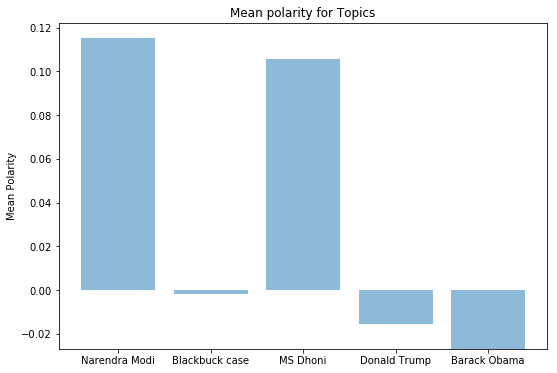

In [64]:
# plot graph

fig = plt.figure(figsize=(1.75*len(polarity_dict.keys()),6))
plot_topics = polarity_dict.keys()
y_pos = np.arange(len(plot_topics))
plt.bar(y_pos, polarity_dict.values(), align = 'center', alpha= 0.5)
plt.xticks(y_pos, polarity_dict.keys())
plt.ylabel('Mean Polarity')
plt.title('Mean polarity for Topics')
plt.show()
